In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the file to into python

In [3]:
Ad_Sale=pd.read_csv(r"D:\DSA - ICT\Week 10\Case study\Add_sales_data_2018.csv")

In [4]:
Ad_Sale.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
#Check the number of rows and columns

In [6]:
Ad_Sale.shape

(205, 7)

In [7]:
#Check basic details of the dataset

In [8]:
Ad_Sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [9]:
Ad_Sale.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [10]:
#There are no null values in the dataset

In [11]:
#Check the statistical summary of the dataset

In [12]:
Ad_Sale.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [13]:
#Check for the distribution 

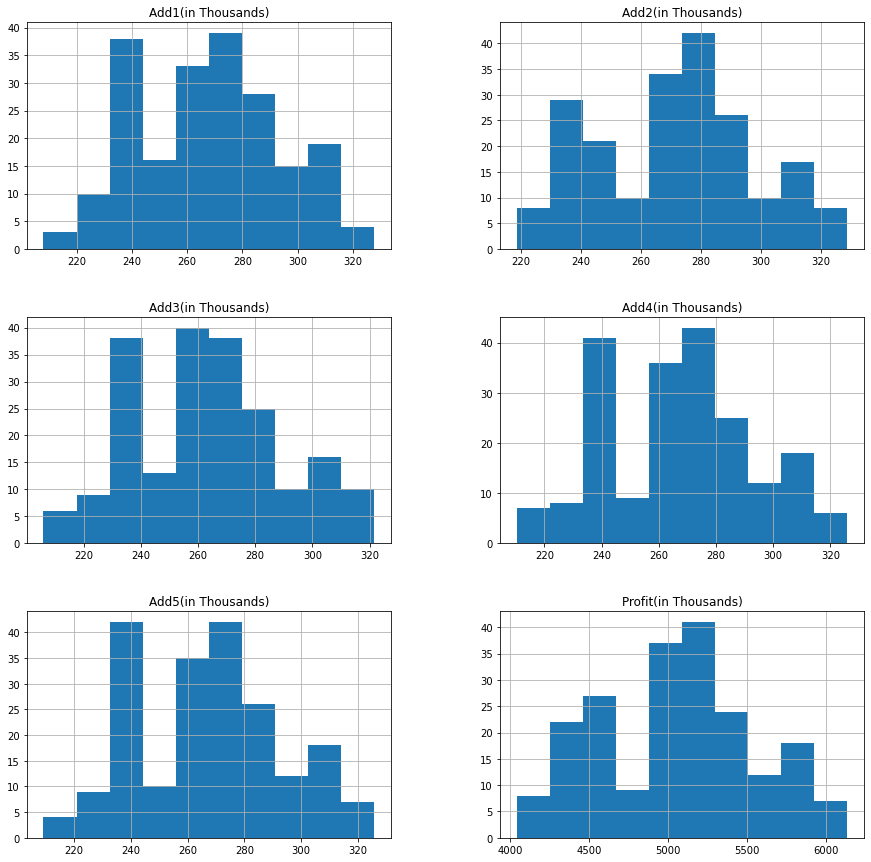

In [14]:
Ad_Sale.hist(figsize=(15,15))
plt.show()

In [15]:
#All the data seems to be normally distributed

In [16]:
#Check for any outliers in the dataset

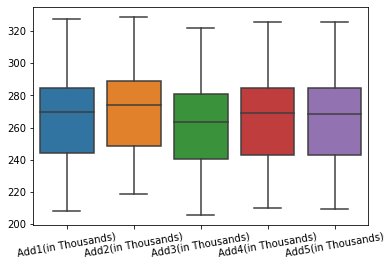

In [17]:
plt.figsize=(15,15)
Dep_var = Ad_Sale.loc[:,["Add1(in Thousands)","Add2(in Thousands)","Add3(in Thousands)","Add4(in Thousands)","Add5(in Thousands)"]]
sns.boxplot(data=Dep_var)
plt.xticks(rotation=10)
plt.show()

In [18]:
#We can see there are no outliers in the dataset

In [19]:
#Question 1 - check whether there is any relationship between the amount  spent for advertising 
# through five different companies and profit 

In [20]:
#Check the relation ship between the variables and target using visualisation

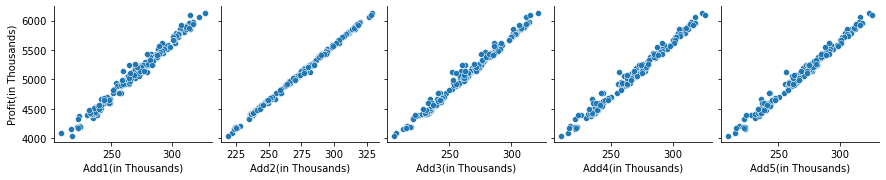

In [21]:
sns.pairplot(Ad_Sale, x_vars=["Add1(in Thousands)","Add2(in Thousands)","Add3(in Thousands)","Add4(in Thousands)","Add5(in Thousands)"], y_vars=["Profit(in Thousands)"], kind="scatter")

In [22]:
#We have a linear relationship of variables with the target and also the data is continous 

In [23]:
#The data is continous and follows normal distribution - so meeting the assumption of the Linear regression algorithm

In [24]:
#Now till check using the heatmap and Correlation function

<AxesSubplot:>

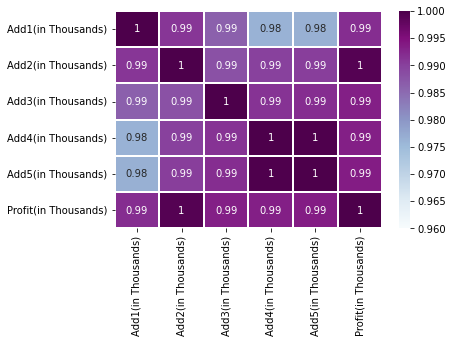

In [25]:
sns.heatmap(Ad_Sale.corr(),vmin = 0.96, vmax= 1,annot = True,linewidth =0.2,cmap = "BuPu")

In [26]:
#All the variables have high positive co relation with the profit variable
#Add1 have positive co relation of 0.99 with the profit
#Add2 have positive co relation of 1 with the profit- this is perfect positive relation
#Add3 have positive co relation of 0.99 with the profit
#Add4 have positive co relation of 0.99 with the profit
#Add5 have positive co relation of 0.99 with the profit
#From the above , the maximum co relation is between Add2 and Profit
#All others have equal corelation of 0.99 with profit which is also very high

In [27]:
# Question 2- Build a regression model to predict the profit from the given data and comment your findings on it.


In [28]:
y=Ad_Sale["Profit(in Thousands)"]
x=Ad_Sale.drop(["Profit(in Thousands)",'Date'], axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

from sklearn import linear_model

lr = linear_model.LinearRegression() 

model = lr.fit(X_train,y_train) 

In [30]:
prediction = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
print('Mean square Error is : ',mean_squared_error(y_test,prediction))

Mean square Error is :  6.362927788869444e-25


In [32]:
#Since the MSE is very low , better will be the line of fit

In [33]:
Predicted=pd.DataFrame(prediction,columns=["Predicted Values"])
Predicted.index.name="Number"

In [34]:
Actual=pd.DataFrame(prediction,columns=["Actual values"])
Actual.index.name="Number"

In [35]:
combined=pd.merge(Predicted,Actual,on="Number",how="left")
combined.head(10)

,Predicted Values,Actual values
Number,,
0,4152.066,4152.066
1,4446.441,4446.441
2,5131.898,5131.898
3,4907.560,4907.560
4,5004.282,5004.282
5,4623.793,4623.793
6,5384.175,5384.175
7,5328.025,5328.025
8,5175.051,5175.051


In [36]:
#Based on the prediction and MSE , we can see that the data is best fit and have more accuracy and matching 
#The predicted and actual values are matching 

In [37]:
#Question 3 - Predict the profit generated by the company, if they wish to spend the following amount for advertisement
#Add1(in Thousands) 290
#Add2(in Thousands) 312
#Add3(in Thousands) 309
#Add4(in Thousands) 298
#Add5(in Thousands) 320

In [38]:
Forecast_values=np.array([290,312,309,298,320]).reshape(1,5)
Forecast_Profit=model.predict(Forecast_values)
print("The profit forecasted from the given values from 5 companies is " ,Forecast_Profit)

The profit forecasted from the given values from 5 companies is  [5820.06]
